In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data here: https://www.kaggle.com/c/titanic/data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
mean_age = round(df['Age'].mean())
mean_age

30

In [6]:
df2 = df.copy()
for i in range(len(df2)):
    if np.isnan(df2['Age'][i]):
        df2['Age'][i] = mean_age

C:\Users\Desmond\AppData\Local\Temp/ipykernel_14848/390067799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'][i] = mean_age


In [7]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df3 = df2.drop(['PassengerId','Name','Cabin','Embarked','Ticket'],axis=1)
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
df3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
df4 = df3.copy()
map_sex = {
    'male': 0,
    'female': 1,
}
df4 = df4.replace({'Sex': map_sex})
df4['Fare'] = (df4['Fare'] - df4['Fare'].mean())/df4['Fare'].std()
df4['Age'] = (df4['Age'] - df4['Age'].mean())/df4['Age'].std()
df4['Parch'] = (df4['Parch'] - df4['Parch'].mean())/df4['Parch'].std()
df4['Pclass'] = (df4['Pclass'] - df4['Pclass'].mean())/df4['Pclass'].std()
df4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,0.826913,0,-0.596720,1,-0.473408,-0.502163
1,1,-1.565228,1,0.633806,1,-0.473408,0.786404
2,1,0.826913,1,-0.289088,0,-0.473408,-0.488580
3,1,-1.565228,1,0.403083,1,-0.473408,0.420494
4,0,0.826913,0,0.403083,0,-0.473408,-0.486064


In [11]:
X = df4.drop(['Survived'],axis=1).values
y = df4['Survived'].values.reshape(-1,1)
X[:5], y[:5]

(array([[ 0.82691282,  0.        , -0.59671964,  1.        , -0.47340772,
         -0.50216314],
        [-1.56522783,  1.        ,  0.63380632,  1.        , -0.47340772,
          0.78640362],
        [ 0.82691282,  1.        , -0.28908815,  0.        , -0.47340772,
         -0.48857985],
        [-1.56522783,  1.        ,  0.40308271,  1.        , -0.47340772,
          0.42049407],
        [ 0.82691282,  0.        ,  0.40308271,  0.        , -0.47340772,
         -0.48606443]]),
 array([[0],
        [1],
        [1],
        [1],
        [0]], dtype=int64))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((712, 6), (712, 1)), ((179, 6), (179, 1)))

In [13]:
class LogisticRegression:

    def sigmoid(self,z):
        '''
        This function applies the sigmoid function to z.
        '''

        return 1/(1 + np.exp(-z))

    def calculate_loss(self,y,y_hat):
        '''
        This function returns the binary cross-entropy loss function for y and y_hat.
        '''

        return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)).mean()
    
    def calculate_gradient(self,X,y,y_hat):
        '''
        This function calculates the gradient for X, y and y_hat.
        '''

        return np.dot(X.T,y_hat-y) / y.size
    
    def predict(self,X,theta):
        '''
        This function returns the predicted values for current X and theta.
        '''

        y_hat = self.sigmoid(np.dot(X,theta))
        return y_hat
    
    def fit(self,X_train,y_train,val,epochs=100,lr=0.01,gamma=0.9,batch_size=32,verbose=10):
        '''
        This function fits the data provided.
        - losses: save loss after every iteration
        - epoch_losses: save loss after one epoch
        - train_accs: save accuracy on train data
        - val_accs: save accuracy on validate data
        - weights: store weights of model
        '''

        losses = []
        epoch_losses = []
        train_accs = []
        val_accs = []
        max_val_acc = 0
        
        best_weights = np.random.rand(X_train.shape[1]+1,1)
        weights = np.random.rand(X_train.shape[1]+1,1)
        
        X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)

        X_val, y_val = val
        X_val = np.concatenate((np.ones((X_val.shape[0],1)),X_val),axis=1)

        n_samples = X_train.shape[0]
        n_steps = int(np.ceil(X_train.shape[0] // batch_size))

        v = np.zeros((X_train.shape[1],1))

        for epoch in range(epochs):
            id_permutations = np.random.permutation(n_samples)

            X_train_shuffled = X_train[id_permutations]
            y_train_shuffled = y_train[id_permutations]
            
            epoch_loss = 0
            for step in range(n_steps):
                Xi = X_train_shuffled[step*batch_size:(step+1)*batch_size]
                yi = y_train_shuffled[step*batch_size:(step+1)*batch_size]
                
                y_hat = self.predict(Xi,weights - gamma*v)
                loss = self.calculate_loss(yi,y_hat)
                losses.append(loss)
                epoch_loss += loss
                
                gradient = self.calculate_gradient(Xi,yi,y_hat)
                weights -= (lr*gradient + gamma*v)
                v = gamma*v + lr*gradient

                y_train_pred = self.predict(Xi,weights).round()
                train_acc = (y_train_pred == yi).mean()
                train_accs.append(train_acc)

                y_val_pred = self.predict(X_val,weights).round()
                val_acc = (y_val_pred == y_val).mean()
                val_accs.append(val_acc)
            
            epoch_loss /= n_steps
            epoch_losses.append(epoch_loss)

            y_val_pred = self.predict(X_val,weights).round()
            val_acc = (y_val_pred == y_val).mean()

            if val_acc > max_val_acc:
                best_weights = weights
                max_val_acc = val_acc

            if epoch % verbose == 0 or epoch == epochs-1:
                print(f'Epoch {epoch} ----- loss: {round(epoch_loss,4)}, acc: {round(val_acc,4)}, best acc: {round(max_val_acc,4)}')
            
        self.weights = weights
        self.best_weights = best_weights
        self.losses = losses
        self.epoch_losses = epoch_losses
        self.train_accs = train_accs
        self.val_accs = val_accs

    def score(self,X_test,y_test):
        X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
        y_hat = self.predict(X_test,self.weights).round()
        acc = (y_hat == y_test).mean()
        return acc

Epoch 0 ----- loss: 0.9298, acc: 0.5084, best acc: 0.5084
Epoch 5000 ----- loss: 0.5207, acc: 0.7486, best acc: 0.7486
Epoch 10000 ----- loss: 0.4812, acc: 0.7765, best acc: 0.7821
Epoch 15000 ----- loss: 0.4641, acc: 0.7877, best acc: 0.7933
Epoch 20000 ----- loss: 0.4565, acc: 0.7821, best acc: 0.7933
Epoch 25000 ----- loss: 0.4465, acc: 0.7821, best acc: 0.7933
Epoch 30000 ----- loss: 0.4499, acc: 0.7933, best acc: 0.7989
Epoch 35000 ----- loss: 0.4445, acc: 0.7933, best acc: 0.7989
Epoch 40000 ----- loss: 0.4475, acc: 0.7877, best acc: 0.7989
Epoch 45000 ----- loss: 0.445, acc: 0.7821, best acc: 0.7989
Epoch 50000 ----- loss: 0.4418, acc: 0.7765, best acc: 0.7989
Epoch 55000 ----- loss: 0.4459, acc: 0.7765, best acc: 0.7989
Epoch 60000 ----- loss: 0.447, acc: 0.7765, best acc: 0.7989
Epoch 65000 ----- loss: 0.4471, acc: 0.7821, best acc: 0.7989
Epoch 70000 ----- loss: 0.4399, acc: 0.7821, best acc: 0.7989
Epoch 75000 ----- loss: 0.447, acc: 0.7821, best acc: 0.7989
Epoch 79999 ----

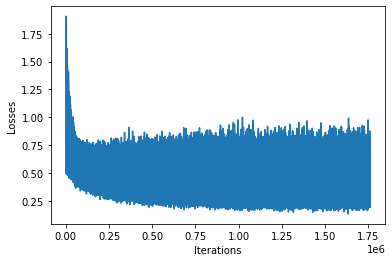

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train,val=(X_test,y_test),lr=0.00000837,batch_size=32,epochs=80000,verbose=5000)

plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.plot(model.losses)

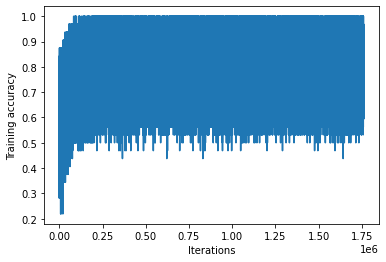

In [15]:
plt.xlabel('Iterations')
plt.ylabel('Training accuracy')
plt.plot(model.train_accs)

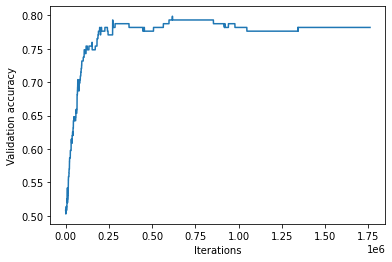

In [16]:
plt.xlabel('Iterations')
plt.ylabel('Validation accuracy')
plt.plot(model.val_accs)

In [17]:
df_test = pd.read_csv('test.csv')
df_test = df_test.drop(['Name','Cabin','Embarked','Ticket'],axis=1)
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [18]:
for i in range(len(df_test)):
    if np.isnan(df_test['Age'][i]):
        df_test['Age'][i] = round(df_test['Age'].mean())
    if np.isnan(df_test['Fare'][i]):
        df_test['Fare'][i] = round(df_test['Fare'].mean())

C:\Users\Desmond\AppData\Local\Temp/ipykernel_14848/2571279304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Age'][i] = round(df_test['Age'].mean())
C:\Users\Desmond\AppData\Local\Temp/ipykernel_14848/2571279304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Fare'][i] = round(df_test['Fare'].mean())


In [19]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [20]:
map_sex = {
    'male': 0,
    'female': 1,
}
df_test = df_test.replace({'Sex': map_sex})
df_test['Fare'] = (df_test['Fare'] - df_test['Fare'].mean())/df_test['Fare'].std()
df_test['Age'] = (df_test['Age'] - df_test['Age'].mean())/df_test['Age'].std()
df_test['Parch'] = (df_test['Parch'] - df_test['Parch'].mean())/df_test['Parch'].std()
df_test['Pclass'] = (df_test['Pclass'] - df_test['Pclass'].mean())/df_test['Pclass'].std()

In [21]:
X_test = df_test.drop(['PassengerId'],axis=1).values
X_test[:5]

array([[ 0.87243644,  0.        ,  0.33901761,  0.        , -0.39976865,
        -0.49782646],
       [ 0.87243644,  1.        ,  1.32833176,  1.        , -0.39976865,
        -0.5126759 ],
       [-0.31544119,  0.        ,  2.51550874,  0.        , -0.39976865,
        -0.46454775],
       [ 0.87243644,  0.        , -0.25457089,  0.        , -0.39976865,
        -0.4829036 ],
       [ 0.87243644,  1.        , -0.65029655,  1.        ,  0.61915388,
        -0.41798657]])

In [22]:
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
X_test[:5]

array([[ 1.        ,  0.87243644,  0.        ,  0.33901761,  0.        ,
        -0.39976865, -0.49782646],
       [ 1.        ,  0.87243644,  1.        ,  1.32833176,  1.        ,
        -0.39976865, -0.5126759 ],
       [ 1.        , -0.31544119,  0.        ,  2.51550874,  0.        ,
        -0.39976865, -0.46454775],
       [ 1.        ,  0.87243644,  0.        , -0.25457089,  0.        ,
        -0.39976865, -0.4829036 ],
       [ 1.        ,  0.87243644,  1.        , -0.65029655,  1.        ,
         0.61915388, -0.41798657]])

In [23]:
y_pred = model.predict(X_test,model.best_weights).round().reshape(418,).astype(int)
y_pred.shape

(418,)

In [24]:
ids = df_test['PassengerId'].values
ids.shape

(418,)

In [25]:
submission = pd.DataFrame({'PassengerId': ids, 'Survived': y_pred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
submission.to_csv('submission.csv',index=False)